In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import simpleaudio as sa
import scipy.io
from scipy.io import wavfile as wav


# Lab 1 Report

Oleh Kondratyuk, Cynthia Li and Marco Mak


## Summary

This lab aims to familarize with array operation, basic sound file operations, and signal plotting using python.

## Assignment 1 -- Creating and Manipulating Arrays

In [8]:
# Assignment 1 - Creating and Manipulating Arrays

# Part A
y1 = np.array([4,6,2])

# Part B
ca = y1[1]
cb = y1[len(y1)-2: len(y1)]
d = len(y1)
print("ca = ", ca, "\ncb = ", cb, "\nd = ", d )

# Part C
x1 = 2*np.ones(5)
x2 = np.arange(-2,3)
print("x1 = ", x1, "\nx2 = ", x2)

# Part D
arrp = x1 + x2
arrc = np.concatenate([x1, x2])
print("arrp = ", arrp, "\narrc = ", arrc)

ca =  6 
cb =  [6 2] 
d =  3
x1 =  [2. 2. 2. 2. 2.] 
x2 =  [-2 -1  0  1  2]
arrp =  [0. 1. 2. 3. 4.] 
arrc =  [ 2.  2.  2.  2.  2. -2. -1.  0.  1.  2.]


###  Discussion
**Comment on the difference between concatenation and addition of two vectors. What are the constraints in terms of when these functions can be applied?**

When adding two vectors, the values at the same indecies are summed arithmatically resulting in a vector of the same magnitude but altered value. Whereas when concatenating two vectors, the added vector is joined to the end of the first vector, resulting in a single larger vector without altering original values of elements. 

Addition is only possible when the vectors are the exact same length. Wheras when concatenating, the vectors can be of any length in same dimension.




## Assignment 2 -- Amplitude Operations on Signals

In [11]:
# Assignment 2 - Title of Assignment 2

# Part A
fs = 2
Ts = 1/fs
t = np.arange(0,3 +Ts,Ts)
print("t = ",t)
x = 0.5*t
y = t**2
print("x = ", x, "\ny = ", y)

# Part B
z = x - 2*y
print("z = ", z)

# Part C
w1 = z[4]
print("w1 = ",w1)

# Part D
w2 = z[:4]
print("w2 = ", w2)

t =  [0.  0.5 1.  1.5 2.  2.5 3. ]
x =  [0.   0.25 0.5  0.75 1.   1.25 1.5 ] 
y =  [0.   0.25 1.   2.25 4.   6.25 9.  ]
z =  [  0.    -0.25  -1.5   -3.75  -7.   -11.25 -16.5 ]
w1 =  -7.0
w2 =  [ 0.   -0.25 -1.5  -3.75]


### Discussion
**Discuss how the results of this problem would change if you used fs=1 instead of fs=2.**

By reducing the sampling frequency, we would've taken half as many samples (per second and in total). This would in effect lower the resolution of our continuous signal but would also reduce the size of the memory that the digitized signal occupies on our computer (e.g. if the original file was 2 kb, the halved fs would be of size 1 kb).

## Assignment 3 -- Working with Sound Files

In [12]:
# Assignment 3

# Part A
train_obj = sa.WaveObject.from_wave_file('train32.wav')
tuba_obj = sa.WaveObject.from_wave_file('tuba11.wav')

fs1, y1 = wav.read('train32.wav')
fs2, y2 = wav.read('tuba11.wav')

print("Train file has ", train_obj.num_channels, " channel ", 
      "\nand Tuba file has ", tuba_obj.num_channels, " channels")

# Part B
print("Playing both original files:")
train_obj.play().wait_done()
tuba_obj.play().wait_done()

print("Now with their sampling frequencies reversed: ")
sa.play_buffer(y1, train_obj.num_channels,
              train_obj.bytes_per_sample, fs2).wait_done()
sa.play_buffer(y2, tuba_obj.num_channels,
              tuba_obj.bytes_per_sample, fs1).wait_done()


# Part C
print("Train file length: ",len(y1))
print("Tuba file length: ", len(y2[:,1]))

tuba0 = y2[:,0]    # Tuba Channel 1
tuba1 = y2[:,1]    # Tuba Channel 2


y3 = tuba0[0:len(y1)]
y4 = np.concatenate([y1, y3])
print("Combining the train singal and an equal-length segment of the tuba signal:")
sa.play_buffer(y4, 1, train_obj.bytes_per_sample, fs1).wait_done()
outfile = 'Part3c.wav'
wav.write(outfile,fs1,y4.astype('int16'))

# Part D
pause = np.zeros(int(4*fs1)) # create a 4-sec pause

y5 = np.concatenate([y1, pause, tuba0])
print("Both signals with a four second pause between them (Sounds absolutly horrible for some reason)")
print("I sounds as it should when I play the file that is written ('Part3d.wav'),\nbut the code itself creates a horrible sound")
sa.play_buffer(y5, 1, 2, fs1).wait_done()
outfile = 'Part3d.wav'
wav.write(outfile,fs1,y5.astype('int16'))


Train file has  1  channel  
and Tuba file has  2  channels
Playing both original files:
Now with their sampling frequencies reversed: 
Train file length:  50313
Tuba file length:  109708
Combining the train singal and an equal-length segment of the tuba signal:
Both signals with a four second pause between them (Sounds absolutly horrible for some reason)
I sounds as it should when I play the file that is written ('Part3d.wav'),
 but the code itself creates a horrible sound


### Discussion
**Comment on how the audio changes when the incorrect sampling frequency is used. You should notice two ways in which the sound changes. The train sound is mono, and the tuba sound is stereo. How did that impact your solution to parts C and D?**

When the incorrect sampling frequencies were used, there was a change in pitch (if the sampling frequency was faster, then the pitch raised, if to slow, then the pitch fell). The length of the sound signal (in seconds) was also affected, if the sampling frequency was increased by a factor of α, the length of the singal will decrease by a factor of α, and vice versa.

Because the tuba file is stereo, the data was stored in two channels instead of one like the train file.Thus, in order to concatenate the data for the train and tuba files in parts c and d, we first had to extract the tuba's file data from one of the two channels prior to concatenation.

## Assignment 4 -- Plotting Comparisons

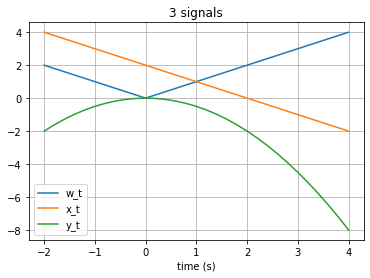

In [5]:
# Assignment 4

# Part A
fs = 5
Ts = 1/fs
t = np.arange(-2,4+Ts, Ts)
w_t = np.abs(t)
x_t = 2 - t
y_t = -0.5*(t**2)

# Part B
fig1 = plt.figure(1)
plt.plot(t, w_t, label = 'w_t')
plt.plot(t, x_t, label = 'x_t')
plt.plot(t, y_t, label = 'y_t')
plt.xlabel('time (s)')
plt.title('3 signals')
plt.grid()
plt.legend()
plt.show()


### Discussion
**Read the plot documentation and explain how you would change the command to distinguish the signals using different line styles (solid, dashed, dotted) to make the figure easier to read for someone who is color blind.**

According to the matplotlib.pyplot.plot documentation, line style can be specified as an optional argument in the plot() function. Solid corresponds to '-', dashed = '--' and dotted = ':' in order to facilitate color blind viewers. 
Source: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html

Note: Colors can also be specified in the same manner, for example a red dotted line would be 'r:'.

## Assignment 5 -- Plotting Sound Files using Subplots


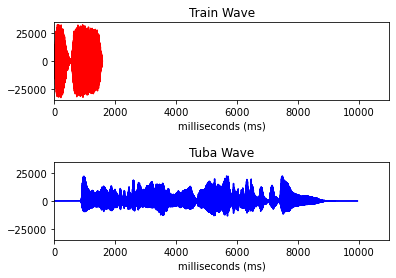

In [6]:
# Assignment 5 -- Plotting Sound Files using Subplots

# Part A
Ts1 = 1/fs1
Ts2 = 1/fs2

t1 = 1000*np.arange(0, len(y1)/fs1, Ts1)
t2 = 1000*np.arange(0, len(y2)/fs2, Ts2)

# Part B
fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = 0.8, wspace = 0.5)

plt.subplot(2,1,1)
plt.plot(t1, y1, 'r-')
plt.title('Train Wave')
plt.xlabel('milliseconds (ms)')
plt.ylim(-35_000, 35_000)
plt.xlim(0, 11_000)

plt.subplot(2,1,2)
plt.plot(t2, y2, 'b-')
plt.title('Tuba Wave')
plt.xlabel('milliseconds (ms)')
plt.ylim(-35_000, 35_000)
plt.xlim(0, 11_000)

plt.show()

### Discussion
**Comment on the differences between the plots of the signals. Can you see the difference in sampling rate in these plots?**

There are several differences between the train and tuba signals that the above plots make visible. One is the length, with the tuba signal has longer duration than the train signal. The other is volume/amplitude, with the train signal being significantly louder than the tuba signal. 

The sampling rate is something that we cannot discern from the above graphs. It would require us to zoom in significantly for us to see or to calculate the time between the discrete points.